# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it


# autoreload modules when code is run
%reload_ext autoreload
%autoreload 2



# local modules
import gade
import inauguralproject


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [41]:
# code for solving the model (remember documentation and comments)

m = 1 #cash-on-hand
v = 10 #disutility of labor
eps = 0.3 #elasticity of labor supply
tau_0 = 0.4 #standard labor income tax
tau_1 = 0.1 #top bracket labor income tax
kappa = 0.4 #cut-off for top labor income tax


l_star = inauguralproject.optimizer(0.5,eps=0.3,v=10,tau_0=0.4,tau_1=0.1,kappa=0.4,m=1)[0]
c_star = inauguralproject.optimizer(0.5,eps,v,tau_0,tau_1,kappa,m)[1]
u_star = inauguralproject.optimizer(0.5,eps,v,tau_0,tau_1,kappa,m)[2]

print('Labour supply is: ' + str(l_star))
print('Consumption is: ' + str(c_star))
print('Utility is: ' + str(u_star)

Labour supply is: 0.31961536193545265
Consumption is: 1.119903840483863
Utility is: -0.09677772523865749


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

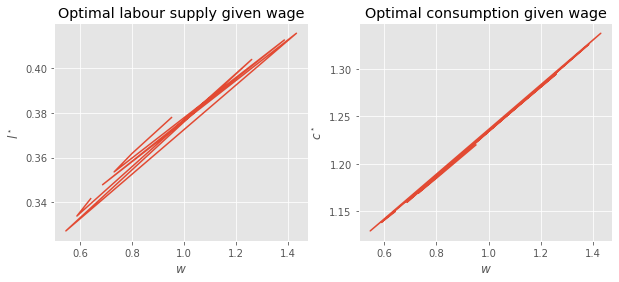

In [46]:
plt.style.use('ggplot')

np.random.seed(117)
N=10
w_vec = np.random.uniform(0.5, 1.5, size=N)
l_opt = np.empty(N)
c_opt = np.empty(N)

for i,w in enumerate(w_vec):
    opt = inauguralproject.optimizer(w,eps,v,tau_0,tau_1,kappa,m)
    l_opt[i] = opt[0]
    c_opt[i] = opt[1]
    
fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show

# Question 3

ADD ANSWER.

In [48]:
tax = lambda l_opt, w_vec: tau_0*w_vec*l_opt + tau_1*np.max(w_vec*l_opt-kappa,0)
tax_rev=tax(l_opt,w_vec)
#print(tax)
np.sum(tax_rev)
#print(tax_rev)

1.8976470723989123

# Question 4

ADD ANSWER.

In [47]:
new_eps = 0.1

w_vec = np.random.uniform(0.5, 1.5, size=N)
l_opt_new = np.empty(N)
c_opt_new = np.empty(N)

for i,w in enumerate(w_vec):
    opt = inauguralproject.optimizer(w,new_eps,v,tau_0,tau_1,kappa,m)
    l_opt_new[i] = opt[0]
    c_opt_new[i] = opt[1]

new_tax = lambda l_opt_new, w_vec: tau_0*w_vec*l_opt_new + tau_1*np.max(w_vec*l_opt_new-kappa,0)
tax_rev_new=new_tax(l_opt_new,w_vec)
#print(new_tax)
np.sum(tax_rev_new)
#print(tax_rev)

4.037020506303495

# Question 5

ADD ANSWER.

In [64]:
Nx = 10
skat_star = 0

tao0_vec = np.linspace(0,1,11)
tao1_vec = np.linspace(0,1,11)
kappa_vec = np.linspace(0,1,11)

print(kappa_vec[10])

for i,j,k in it.product(range(10), range(10), range(10)):
    opt = inauguralproject.optimizer(w,eps,v,tao0_vec[i],tao1_vec[j],kappa_vec[k],m)

    skat = tao0_vec[i] * 1 * opt + tao1_vec[j] * np.max(1*opt-kappa_vec[k],0)

    if skat > skat_star :
        skat_star = skat 
    else : skat_star = skat_star

print(skat_star)


1.0


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

# Conclusion

ADD CONCISE CONLUSION.